<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>14.DECISION TREE</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>Decision Tree Classification</b></u>
</div>

## Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


In [27]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score


In [28]:
#1.Load Dataset
df=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

print("\nColumns in Dataset:")
print(df.columns)
print("\n Shape:",df.shape)
print(df.head())


Columns in Dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

 Shape: (908, 13)
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [29]:
#2.Exploratory Data Analysis

print("\nMissing values:",df.isnull().sum())


Missing values: age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


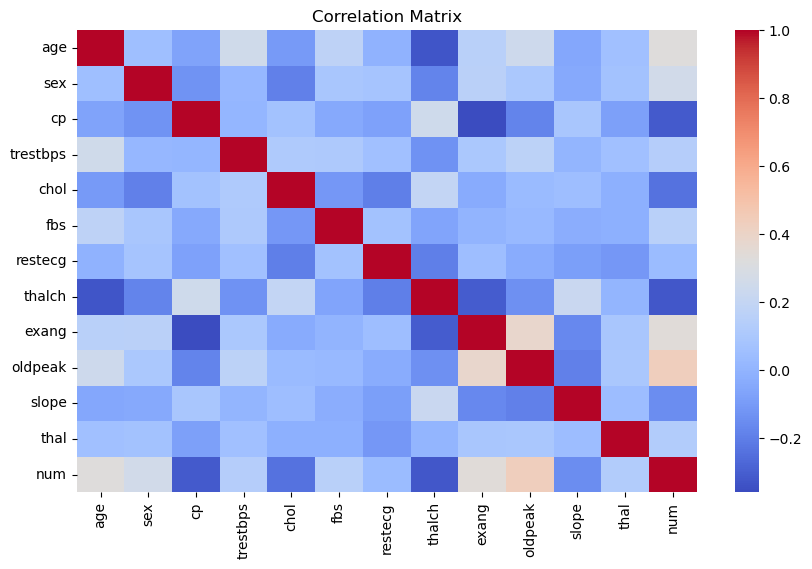

In [30]:
#Encode Categorical columns if any
label_encoders={}
for col in df.columns:
    if df[col].dtype=='object' or df[col].dtype=='bool':
        df[col]=df[col].astype(str) #FORCE uniform datatype
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
        label_encoders[col]=le


#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


In [31]:
#3.Feature and target split
x=df.iloc[:,:-1] #all columns except target
y=df.iloc[:,-1] #target column(last column)

In [32]:
#4.Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)

In [33]:
#5. Decision Tree Model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)


Accuracy: 0.4725274725274725

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        80
           1       0.39      0.34      0.36        53
           2       0.26      0.32      0.29        22
           3       0.27      0.38      0.31        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.49      0.47      0.48       182



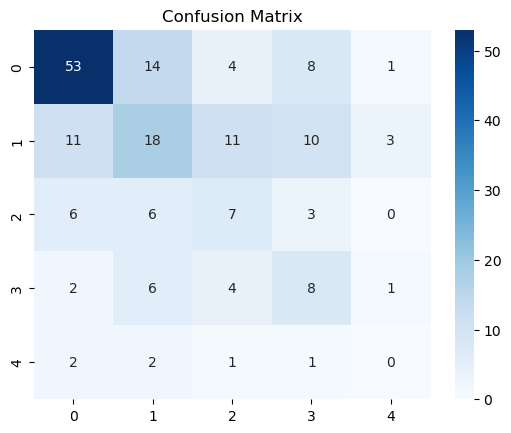

In [34]:
#6.Model Evaluation
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nClassification report:\n",classification_report(y_test,y_pred))

confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [38]:
#7. Hyperparameter tuning
param_grid={
    "max_depth":[3,5,7,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
"criterion":["gini","entropy"]
}

grid=GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(x_train,y_train)

best_model=grid.best_estimator_
y_best_pred=best_model.predict(x_test)

print("\nBest Parameters:",grid.best_params_)
print("Tuned Accuracy:",accuracy_score(y_test,y_best_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Accuracy: 0.5054945054945055


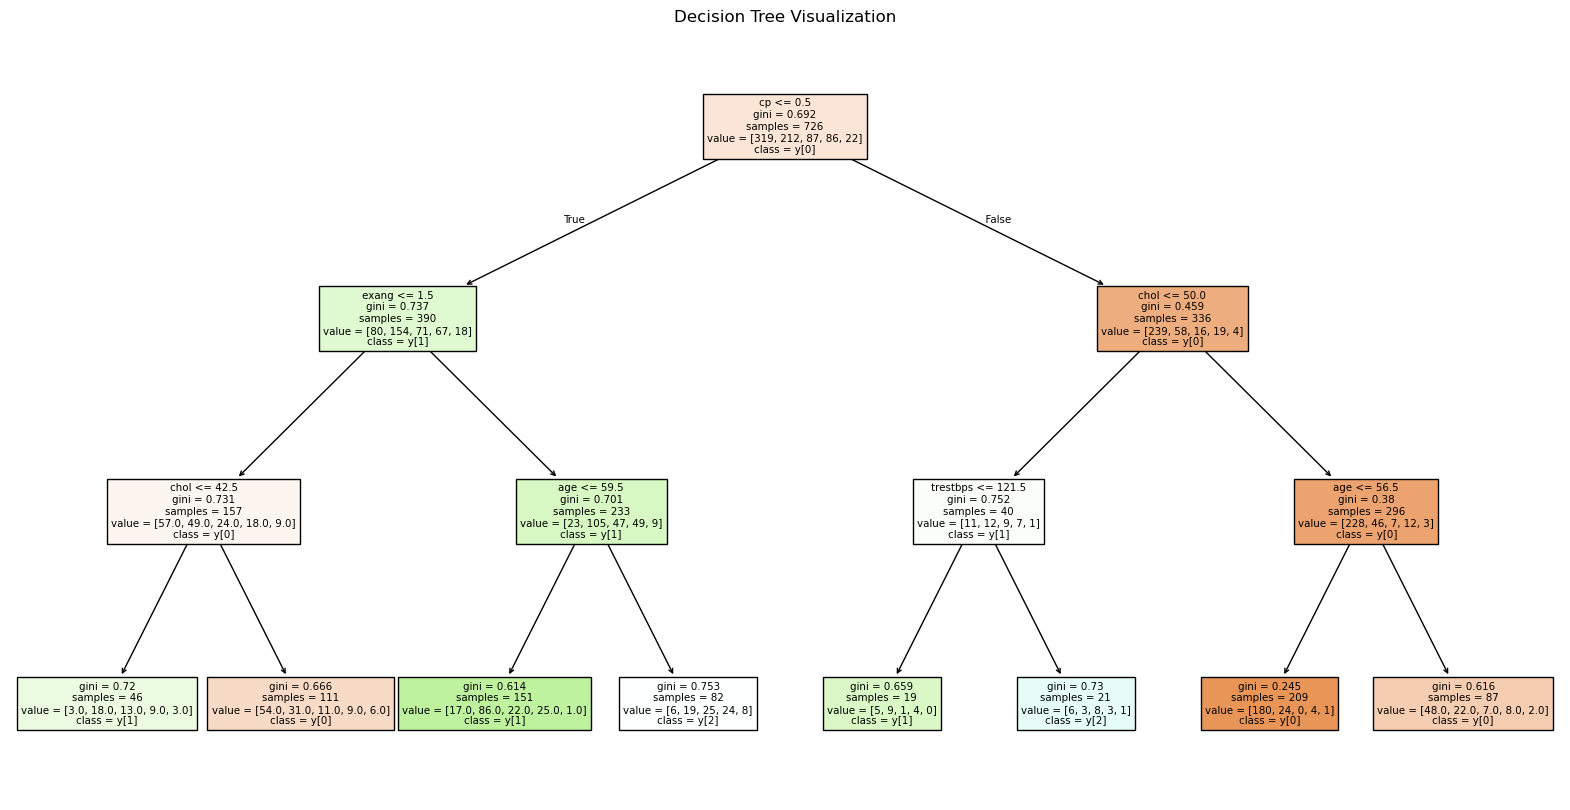

In [39]:
#8.Visualize Decision Tree

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=x.columns,
    class_names=True,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

## Interview Questions
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision Tree hyperparameters control model complexity and help prevent overfitting.
max_depth: Limits the depth of the tree. Lower values reduce overfitting.
min_samples_split: Minimum samples required to split a node. Higher values make the tree simpler.
min_samples_leaf: Minimum samples at a leaf node. Helps smooth predictions.
criterion: Measure to evaluate splits (gini or entropy).
max_features: Number of features considered for each split.
These parameters balance bias and variance to improve model performance

2. What is the difference between the Label encoding and One-hot encoding?                                                         
Label Encoding: Assigns a unique integer to each category.
It is simple but may introduce an unintended order. Best suited for ordinal data.

One-Hot Encoding: Creates separate binary columns for each category.
It avoids ordering issues and works well for nominal data, but increases dimensionality.